**NLP Project Team Excelsior (Round I & Round II)**
===
Team Excelsior:  <br>
```1. Parth Patel (18UCS015)``` <br>
```2. Mavani Deep Vinodbhai (18UCS033)``` <br>
```3. Siddharth Singhvi (18UCS069)``` <br>
```4. Pinkesh Bhaveshkumar Unadkat (18UCS091)```

In [1]:
""" Importing the necessary libraries like:
nltk, matplotlib, wordcloud, re, urllib, collections,
spacy, en_core_web_sm, time, stanza
"""
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")

from urllib.request import urlopen
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.wsd import lesk
from spacy import displacy
import en_core_web_sm
import time

!pip install stanza
import stanza
from stanza.server import CoreNLPClient

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 235kB 4.3MB/s 


In [2]:
# Method definitions

""" Method to plot word cloud given an object
of wordcloud and title
"""
def plotWordCloud(wordcloud, title):
  plt.figure(figsize=(20, 15))
  plt.title(title)
  plt.imshow(wordcloud) 
  plt.axis("off");

""" Method to plot frequency distribution given
an object of FreqDist and title
"""
def plotFreqDist(freqdist, title):
  plt.figure(figsize=(20, 15))
  freqdist.plot(50, title=title)

""" Method to get separate list of tokens and its
corresponding tags from a tagged book
"""
def findTokensAndTags(taggedBook, tokens, tags):
  for (word, tag) in taggedBook:
    tokens.append(word)
    tags.append(tag)

""" Method to find the nouns and verbs in a tagged
book and later categorize these under the categories
in WordNet (26 noun categories & 15 verb categories)
"""
def findCategoriesForNounAndVerb(taggedBook, nouns, nounsCount, verbs, verbsCount):
  tokens = []
  tags = []
  findTokensAndTags(taggedBook, tokens, tags)
  for word in tokens:
    if not lesk(tokens, word):
      continue
    if lesk(tokens, word).pos() == 'n':
      category = lesk(tokens, word).lexname()
      if category not in nounsCount.keys():
        nounsCount[category] = 1
        nouns.update({category:[word]})
      else:
        nounsCount[category] += 1
        nouns[category].append(word)
    elif lesk(tokens, word).pos() == 'v':
      category = lesk(tokens, word).lexname()
      if category not in verbsCount.keys():
        verbsCount[category] = 1
        verbs.update({category:[word]})
      else:
        verbsCount[category] += 1
        verbs[category].append(word)

""" Method to plot bar plot given
the xValues, yValues and title
"""
def plotBarPlot(xValues, yValues, title):
  plt.figure(figsize=(40, 30))
  plt.title(title)
  plt.bar(xValues, yValues)

""" Method to get accuracy of the predicted
entity tags as compared to human annotator
"""
def getAccuracy(prediction, human):
  false = 0
  total = len(human)
  for (pred_word, pred_entity) in prediction:
    for (human_word, human_entity) in human:
      if pred_word == human_word and pred_entity != human_entity:
        false += 1
  return ((total - false)/total) * 100

In [3]:
# Opening urls to the books on Project Gutenberg E-Book Resource

""" Url to the book Dead Men Tell No Tales - E. W. Hornung
"""
urlBook1 = "http://www.gutenberg.org/files/1703/1703-0.txt"
rawBook1 = urlopen(urlBook1).read()
""" Url to the book The Picture of Dorian Gray - Oscar Wilde
"""
urlBook2 = "http://www.gutenberg.org/cache/epub/174/pg174.txt"
rawBook2 = urlopen(urlBook2).read()

In [4]:
""" Decoding the UTF-8 text obtained from the url
"""
rawBook1 = rawBook1.decode("utf-8")
rawBook2 = rawBook2.decode("utf-8")

In [5]:
# Cleaning the raw text using regular expressions

""" Removing the byte order mark aka BOM
"""
cleanedBook1 = re.sub("\ufeff", "", rawBook1)
cleanedBook2 = re.sub("\ufeff", "", rawBook2)
""" Removing the unnecessary line feeds and
carrier feeds
"""
cleanedBook1 = re.sub("(\r\n)+", "\n", cleanedBook1)
cleanedBook2 = re.sub("(\r\n)+", "\n", cleanedBook2)
cleanedBook1 = cleanedBook1.splitlines()
cleanedBook2 = cleanedBook2.splitlines()
cleanedBook1 = " ".join([str(s) for s in cleanedBook1])
cleanedBook2 = " ".join([str(s) for s in cleanedBook2])
""" Removing the Project Gutenberg's license and
copyright details from the beginning and end of 
the texts 
"""
cleanedBook1 = re.sub("The Project Gutenberg.*Chapter XVIII  The Statement of Francis Rattray ", "", cleanedBook1)
cleanedBook1 = re.sub(" End of the Project Gutenberg.*", "", cleanedBook1)
cleanedBook2 = re.sub("The Project Gutenberg.*OSCAR WILDE ", "", cleanedBook2)
cleanedBook2 = re.sub(" End of Project Gutenberg\'s.*", "", cleanedBook2)
""" Removing chapter numbers and their corresponding
chapter names from the texts
"""
cleanedBook1 = re.sub("(CHAPTER [A-Z]*. ([A-Z]* )+)", "", cleanedBook1)
cleanedBook2 = re.sub("CHAPTER [0-9]{,2} ", "", cleanedBook2)

In [6]:
""" Word tokenization of the cleaned text
"""
tokensBook1 = nltk.word_tokenize(cleanedBook1)
tokensBook2 = nltk.word_tokenize(cleanedBook2)

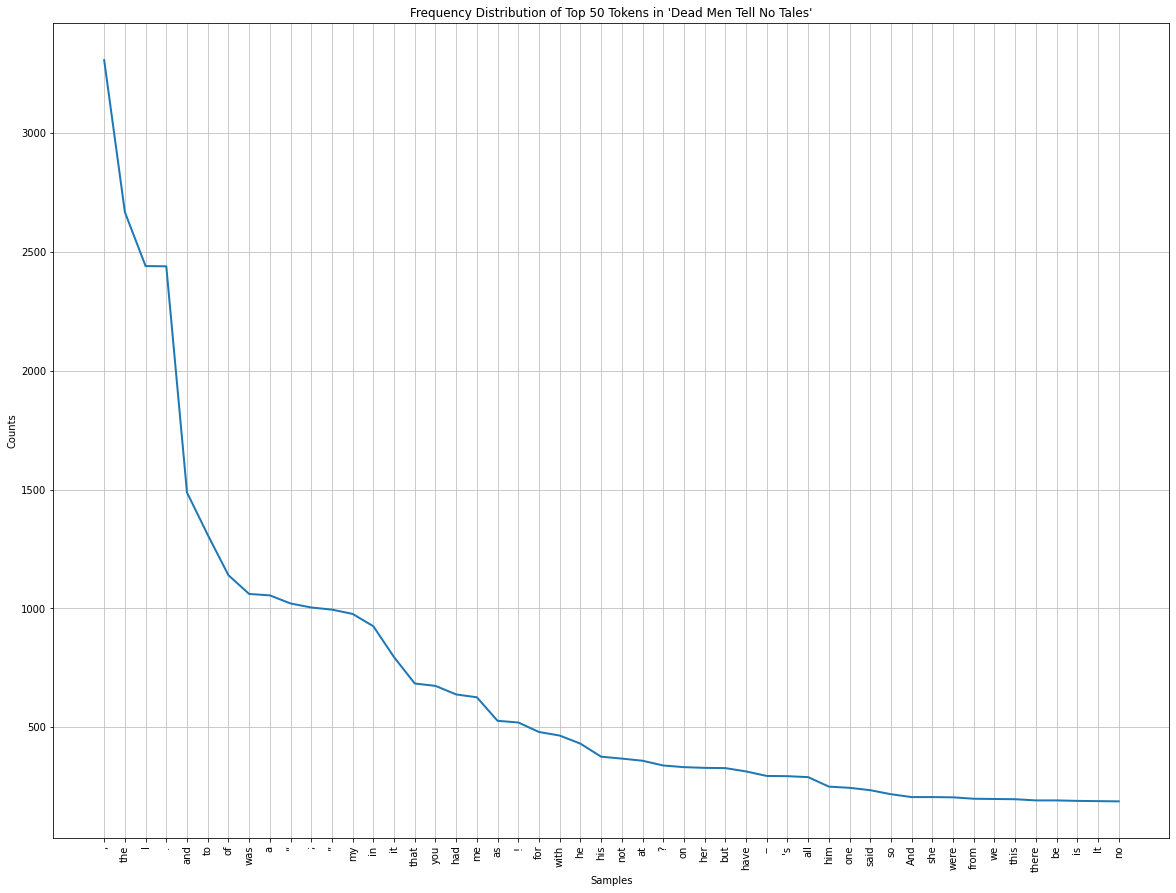

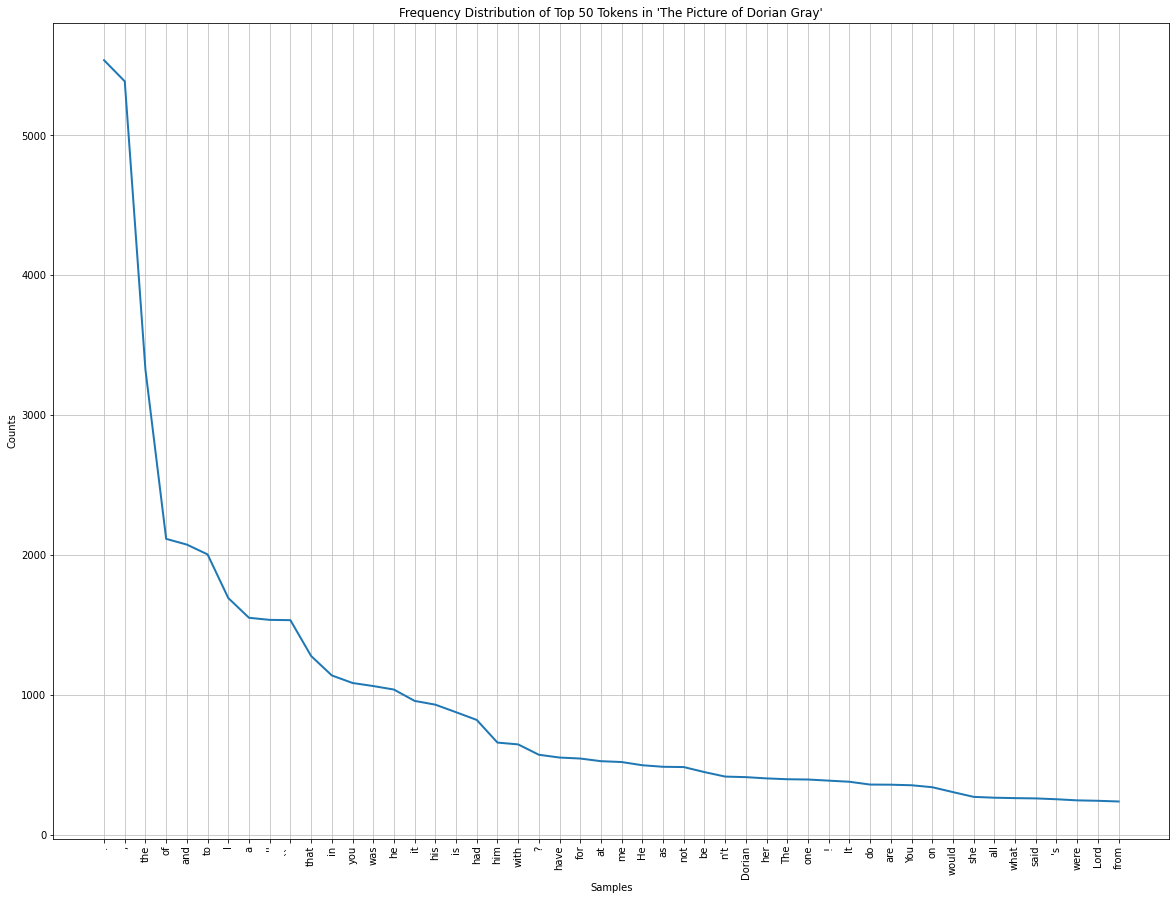

In [7]:
""" Frequency distribution of 50 most frequent tokens
"""
freqDistTokensBook1 = nltk.probability.FreqDist(tokensBook1)
plotFreqDist(freqDistTokensBook1, "Frequency Distribution of Top 50 Tokens in \'Dead Men Tell No Tales\'")
freqDistTokensBook2 = nltk.probability.FreqDist(tokensBook2)
plotFreqDist(freqDistTokensBook2, "Frequency Distribution of Top 50 Tokens in \'The Picture of Dorian Gray\'")

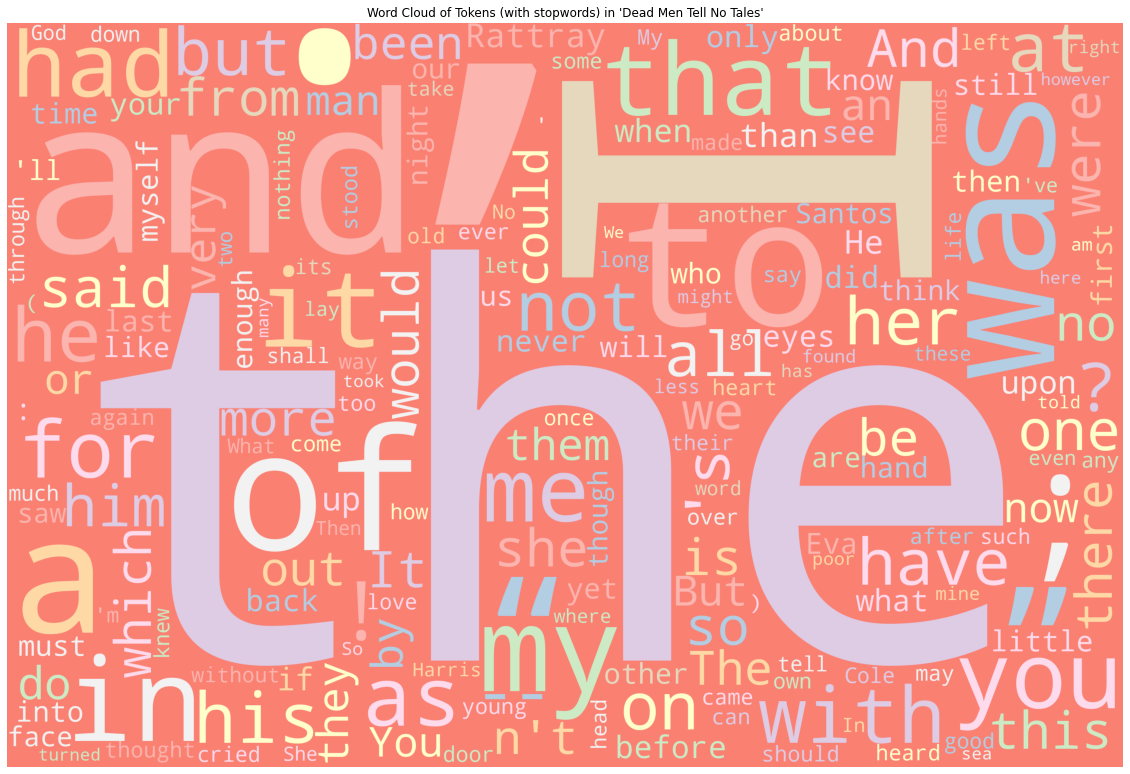

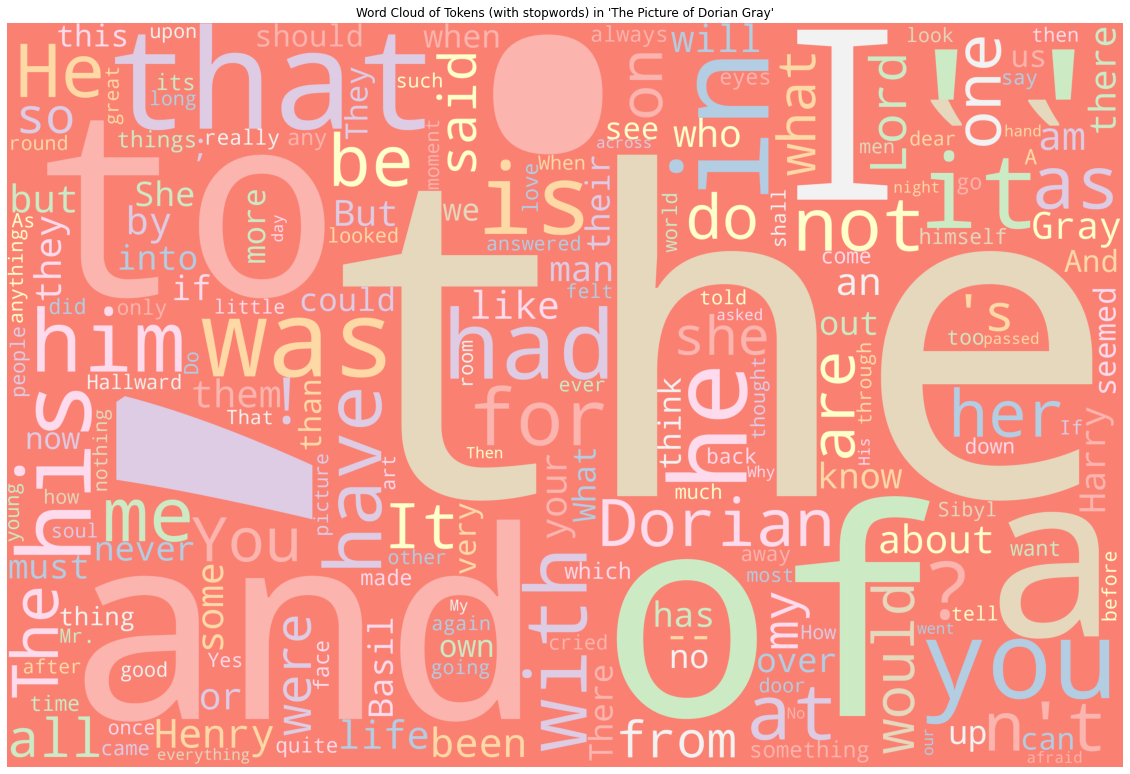

In [8]:
""" Word cloud of texts including the stopwords
"""
dictTokensBook1 = Counter(tokensBook1)
wordCloudWithStopWordsTokensBook1 = WordCloud(width=3000, height=2000, random_state=1, \
                                              background_color="salmon", colormap="Pastel1").generate_from_frequencies(dictTokensBook1)
plotWordCloud(wordCloudWithStopWordsTokensBook1, "Word Cloud of Tokens (with stopwords) in \'Dead Men Tell No Tales\'")
dictTokensBook2 = Counter(tokensBook2)
wordCloudWithStopWordsTokensBook2 = WordCloud(width=3000, height=2000, random_state=1, \
                                              background_color="salmon", colormap="Pastel1").generate_from_frequencies(dictTokensBook2)
plotWordCloud(wordCloudWithStopWordsTokensBook2, "Word Cloud of Tokens (with stopwords) in \'The Picture of Dorian Gray\'")

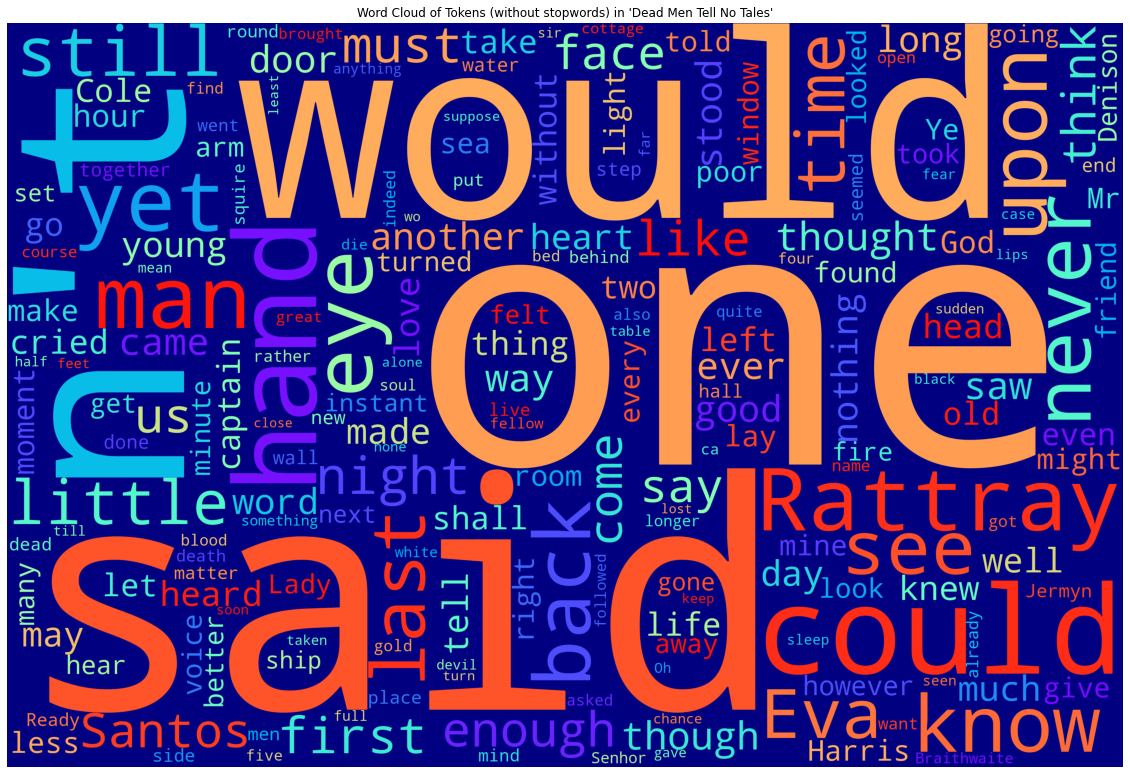

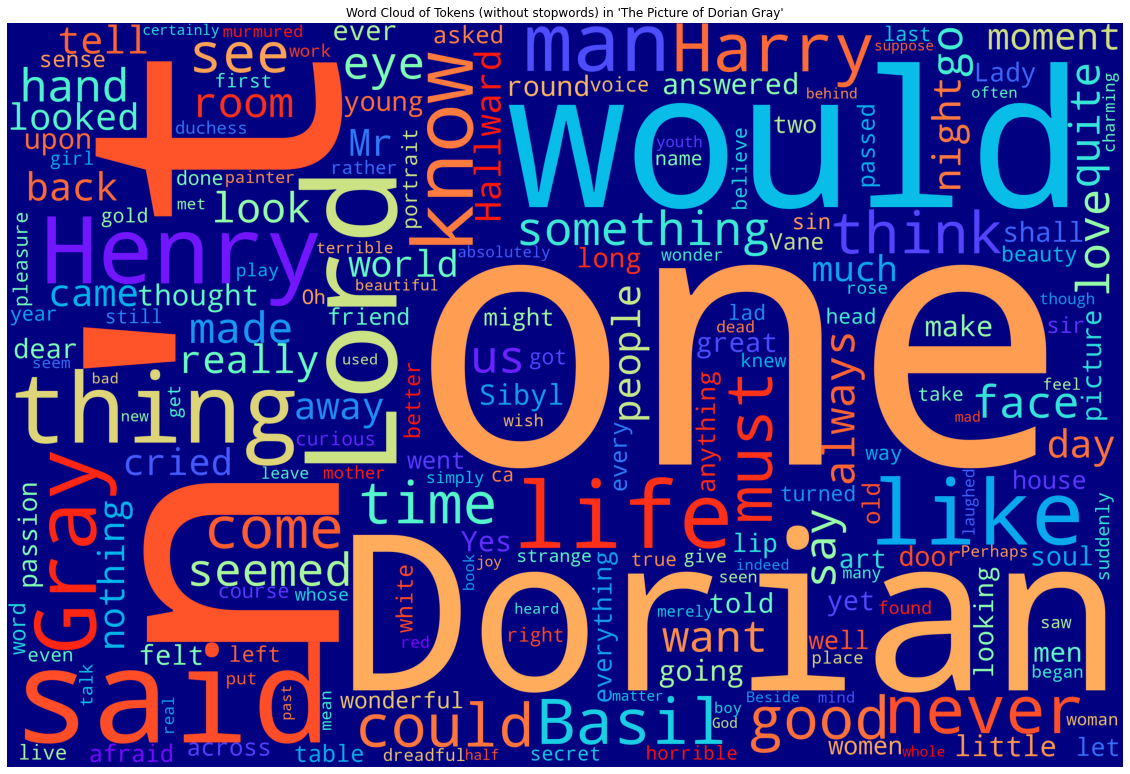

In [9]:
""" Word cloud of texts excluding the stopwords
"""
wordCloudWithoutStopWordsTokensBook1 = WordCloud(width=3000, height=2000, random_state=1, \
                                                 background_color="navy", colormap="rainbow", collocations=False, \
                                                 stopwords=nltk.corpus.stopwords.words("english")).generate(' '.join([str(s) for s in tokensBook1]))
plotWordCloud(wordCloudWithoutStopWordsTokensBook1, "Word Cloud of Tokens (without stopwords) in \'Dead Men Tell No Tales\'")
wordCloudWithoutStopWordsTokensBook2 = WordCloud(width=3000, height=2000, random_state=1, \
                                                 background_color="navy", colormap="rainbow", collocations=False, \
                                                 stopwords=nltk.corpus.stopwords.words("english")).generate(' '.join([str(s) for s in tokensBook2]))
plotWordCloud(wordCloudWithoutStopWordsTokensBook2, "Word Cloud of Tokens (without stopwords) in \'The Picture of Dorian Gray\'")

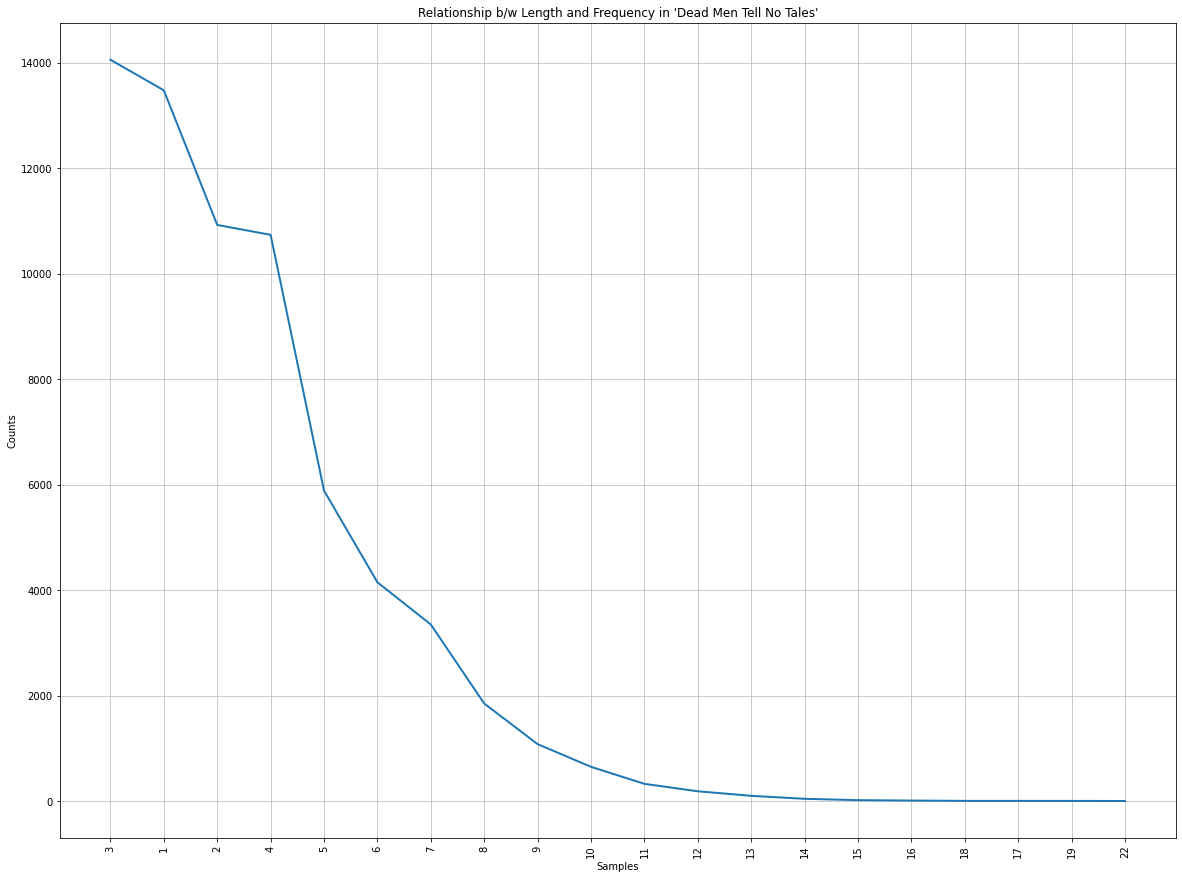

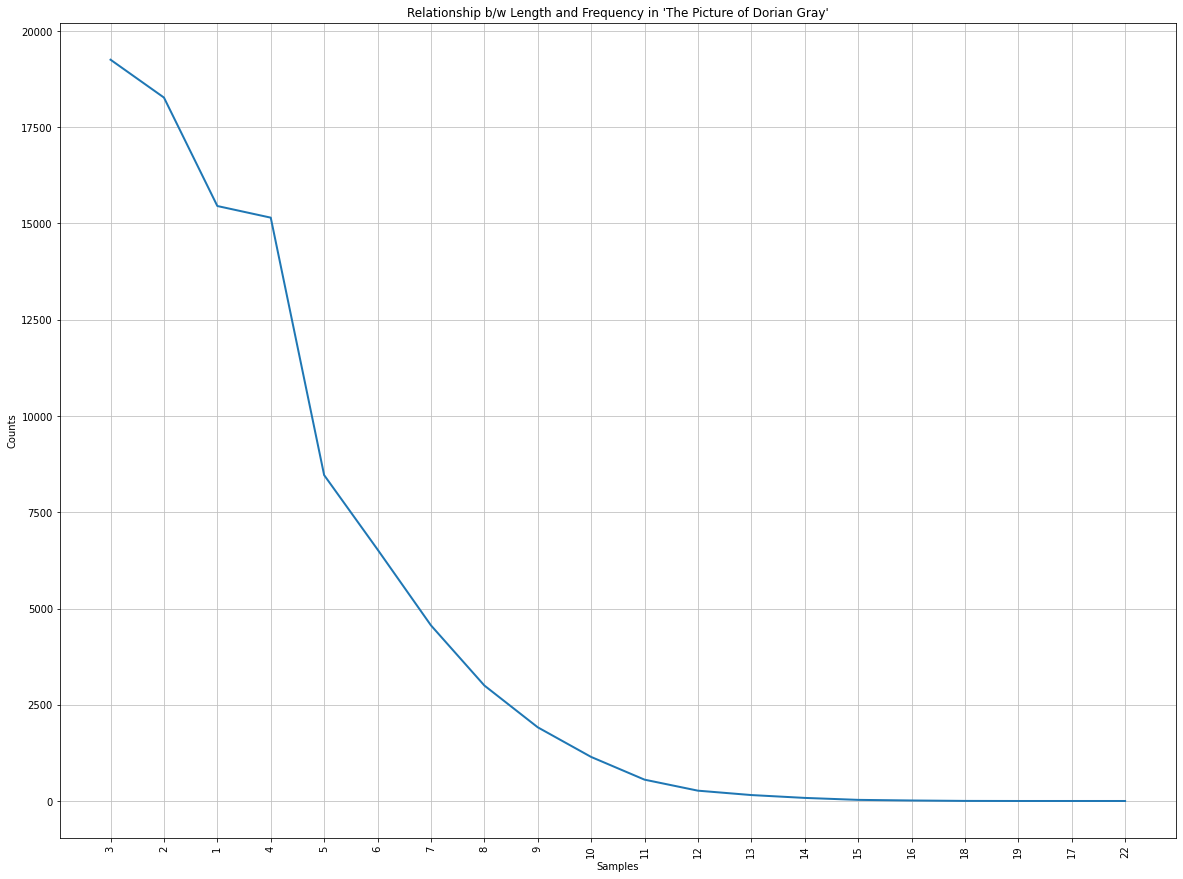

In [10]:
""" Frequency distribution for word lengths
"""
freqDistLengthBook1 = nltk.probability.FreqDist()
for token in tokensBook1:
  freqDistLengthBook1[len(token)] += 1
plotFreqDist(freqDistLengthBook1, "Relationship b/w Length and Frequency in \'Dead Men Tell No Tales\'")
freqDistLengthBook2 = nltk.probability.FreqDist()
for token in tokensBook2:
  freqDistLengthBook2[len(token)] += 1
plotFreqDist(freqDistLengthBook2, "Relationship b/w Length and Frequency in \'The Picture of Dorian Gray\'")

In [11]:
""" PoS tagging for the tokens of both the books
using Penn Treebank PoS TagSet
"""
taggedBook1 = nltk.pos_tag(tokensBook1)
taggedBook2 = nltk.pos_tag(tokensBook2)

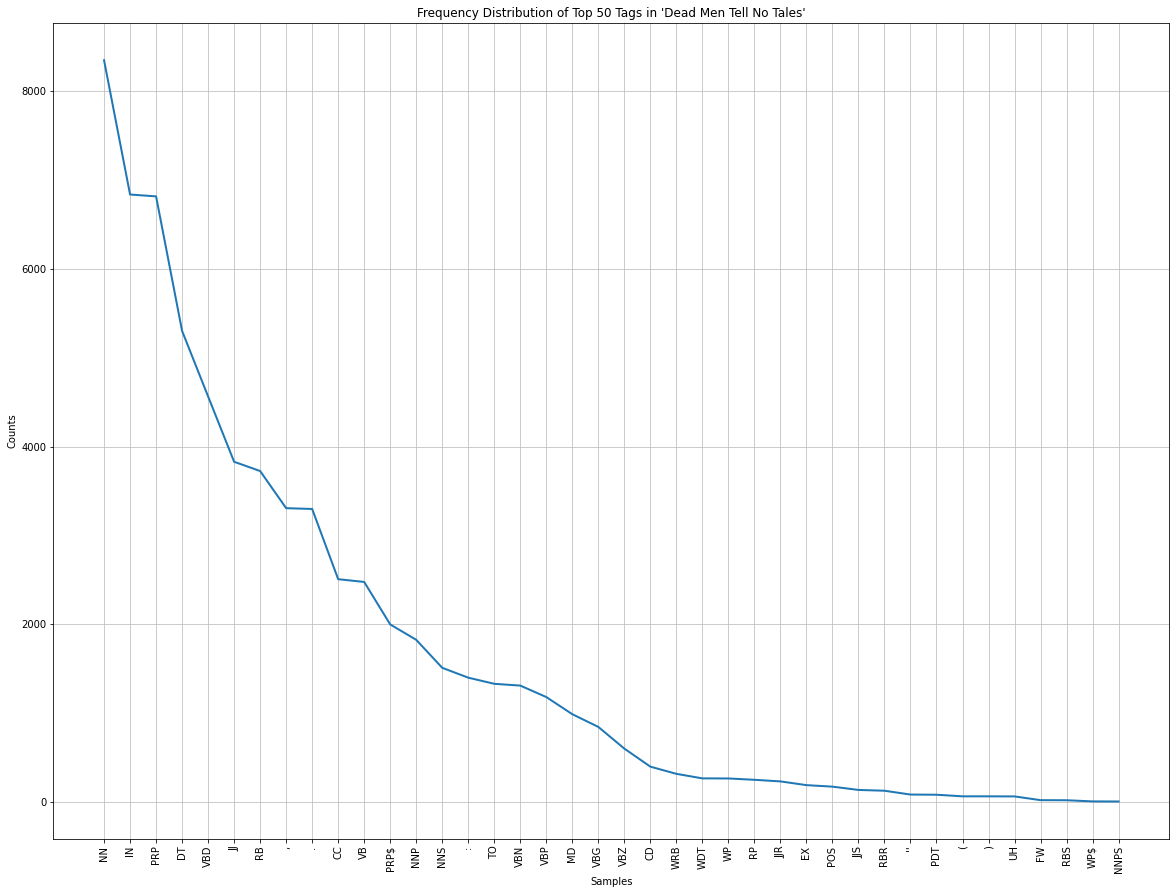

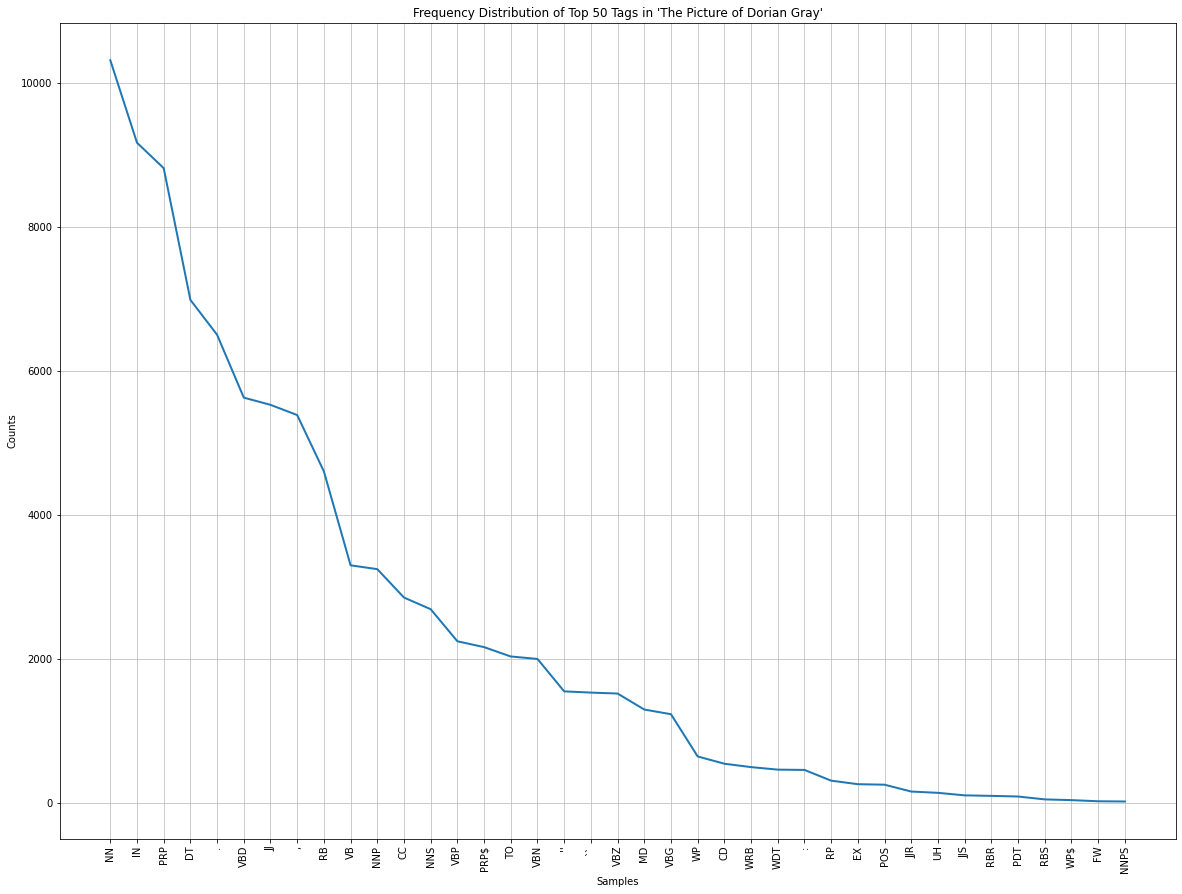

In [12]:
""" Frequency distribution for 50 most frequent tags
"""
freqDistTagsBook1 = nltk.probability.FreqDist(tag for (word, tag) in taggedBook1)
plotFreqDist(freqDistTagsBook1, "Frequency Distribution of Top 50 Tags in \'Dead Men Tell No Tales\'")
freqDistTagsBook2 = nltk.probability.FreqDist(tag for (word, tag) in taggedBook2)
plotFreqDist(freqDistTagsBook2, "Frequency Distribution of Top 50 Tags in \'The Picture of Dorian Gray\'")

In [13]:
""" Extracting Nouns & Verbs and their
WordNet categories for the two books
"""
nouns1 = {}
verbs1 = {}
nounsCount1 = {}
verbsCount1 = {}
findCategoriesForNounAndVerb(taggedBook1, nouns1, nounsCount1, verbs1, verbsCount1)
nouns2 = {}
verbs2 = {}
nounsCount2 = {}
verbsCount2 = {}
findCategoriesForNounAndVerb(taggedBook2, nouns2, nounsCount2, verbs2, verbsCount2)

In [14]:
""" Dictionary of nouns categorized according to
their WordNet categories in Dead Men Tell No Tales
"""
nouns1

{'noun.Tops': ['time',
  'time',
  'being',
  'being',
  'need',
  'being',
  'being',
  'time',
  'needs',
  'time',
  'time',
  'being',
  'time',
  'being',
  'brutes',
  'state',
  'being',
  'time',
  'time',
  'time',
  'time',
  'time',
  'time',
  'time',
  'beings',
  'being',
  'time',
  'need',
  'time',
  'time',
  'time',
  'time',
  'time',
  'time',
  'objects',
  'time',
  'being',
  'being',
  'somebody',
  'time',
  'time',
  'time',
  'time',
  'time',
  'time',
  'need',
  'being',
  'need',
  'state',
  'time',
  'time',
  'time',
  'time',
  'time',
  'motives',
  'amount',
  'time',
  'time',
  'being',
  'object',
  'time',
  'time',
  'events',
  'time',
  'need',
  'time',
  'measures',
  'state',
  'amount',
  'motives',
  'beast',
  'state',
  'events',
  'motive',
  'need',
  'time',
  'need',
  'time',
  'measures',
  'state',
  'time',
  'need',
  'state',
  'motive',
  'state',
  'motive',
  'being',
  'beast',
  'need',
  'need',
  'time',
  'need',
  '

In [15]:
""" Dictionary of verbs categorized according to
their WordNet categories in Dead Men Tell No Tales
"""
verbs1

{'verb.body': ['expected',
  'packed',
  'playing',
  'cries',
  'try',
  'pout',
  'tired',
  'shrug',
  'trouble',
  'sighed',
  'joking',
  'healed',
  'clothes',
  'clothes',
  'calm',
  'apparel',
  'cried',
  'try',
  'calm',
  'shrug',
  'laughed',
  'calm',
  'cry',
  'reproduce',
  'yawning',
  'trouble',
  'cried',
  'faint',
  'shrug',
  'gasping',
  'shrugged',
  'cried',
  'cried',
  'chuckle',
  'calm',
  'tried',
  'pain',
  'clothes',
  'cried',
  'tried',
  'tried',
  'calm',
  'cries',
  'wearied',
  'faint',
  'hated',
  'hated',
  'cries',
  'paling',
  'awoke',
  'playing',
  'pall',
  'trouble',
  'tired',
  'sighed',
  'smiled',
  'try',
  'shrug',
  'expect',
  'expected',
  'multiplied',
  'cried',
  'woke',
  'faint',
  'woke',
  'tried',
  'trouble',
  'cried',
  'cried',
  'produced',
  'frowned',
  'cried',
  'produced',
  'sighed',
  'cried',
  'cried',
  'trouble',
  'trouble',
  'refreshing',
  'expect',
  'tried',
  'faint',
  'awoke',
  'cried',
  'smi

In [16]:
""" Dictionary of nouns categorized according to
their WordNet categories in The Picture of Dorian Gray
"""
nouns2

{'noun.Tops': ['time',
  'being',
  'being',
  'knowledge',
  'Being',
  'time',
  'time',
  'time',
  'time',
  'being',
  'time',
  'motive',
  'time',
  'time',
  'time',
  'time',
  'motive',
  'time',
  'being',
  'times',
  'being',
  'needs',
  'Time',
  'time',
  'time',
  'time',
  'time',
  'time',
  'times',
  'time',
  'time',
  'object',
  'object',
  'object',
  'being',
  'time',
  'being',
  'time',
  'being',
  'time',
  'time',
  'time',
  'being',
  'being',
  'being',
  'time',
  'being',
  'time',
  'somebody',
  'being',
  'time',
  'time',
  'time',
  'being',
  'time',
  'being',
  'time',
  'times',
  'time',
  'being',
  'need',
  'motive',
  'cause',
  'times',
  'phenomenon',
  'motives',
  'time',
  'need',
  'being',
  'times',
  'time',
  'being',
  'need',
  'time',
  'time',
  'being',
  'being',
  'times',
  'being',
  'being',
  'time',
  'time',
  'measure',
  'time',
  'being',
  'being',
  'motives',
  'object',
  'being',
  'being',
  'beast',
  '

In [17]:
""" Dictionary of verbs categorized according to
their WordNet categories in The Picture of Dorian Gray
"""
verbs2

{'verb.body': ['producing',
  'laughed',
  'shrug',
  'play',
  'cried',
  'laughed',
  'smiled',
  'overdressed',
  'trying',
  'tried',
  'plays',
  'cried',
  'frowning',
  'recreate',
  'cried',
  'tire',
  'tire',
  'behaved',
  'frown',
  'cried',
  'blinking',
  'try',
  'cried',
  'tired',
  'faint',
  'played',
  'smiled',
  'cried',
  'trying',
  'laughed',
  'try',
  'produced',
  'tired',
  'cried',
  'awakened',
  'frowned',
  'cried',
  'frown',
  'trying',
  'try',
  'smiled',
  'cried',
  'trying',
  'frowning',
  'cried',
  'awakened',
  'laughed',
  'cried',
  'cried',
  'cried',
  'shrugged',
  'cried',
  'cried',
  'cried',
  'sighed',
  'laughed',
  'cried',
  'pack',
  'produced',
  'expect',
  'hated',
  'behave',
  'laughed',
  'behaves',
  'wakening',
  'playing',
  'toy',
  'wakened',
  'try',
  'cried',
  'cried',
  'try',
  'sighed',
  'chuckled',
  'frowned',
  'cried',
  'try',
  'playing',
  'play',
  'cried',
  'shrugging',
  'try',
  'laughed',
  'cried

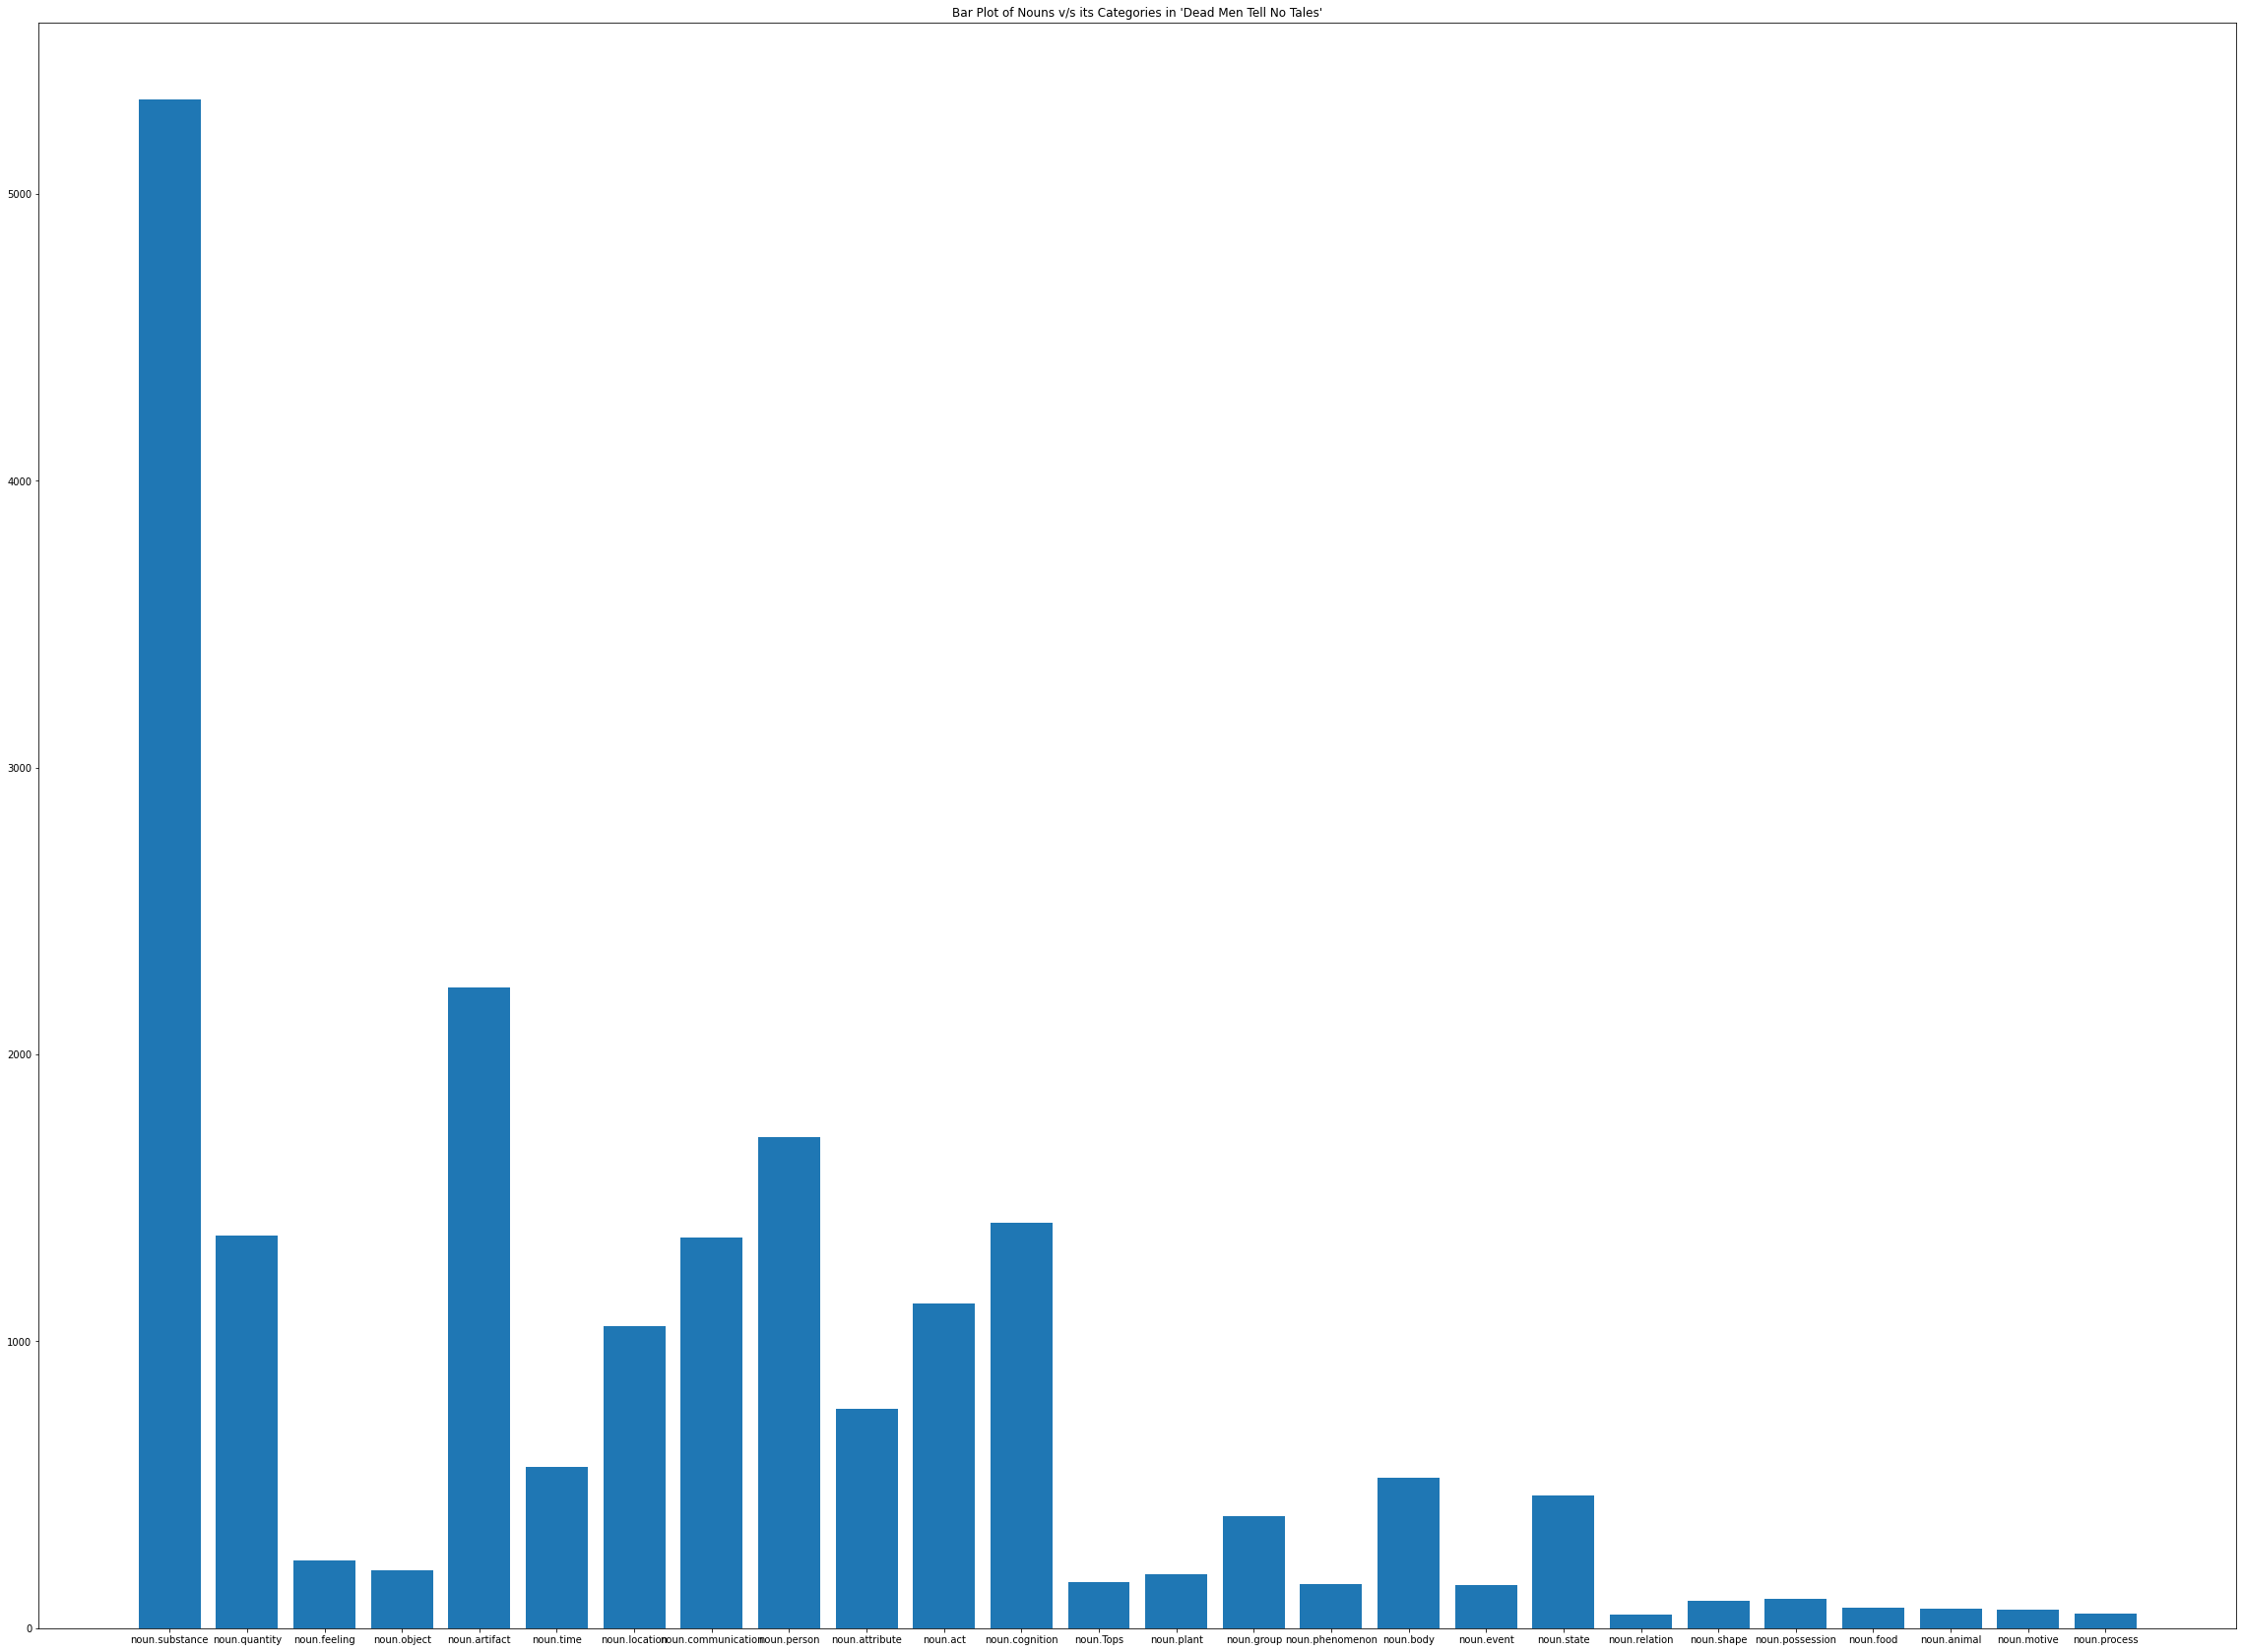

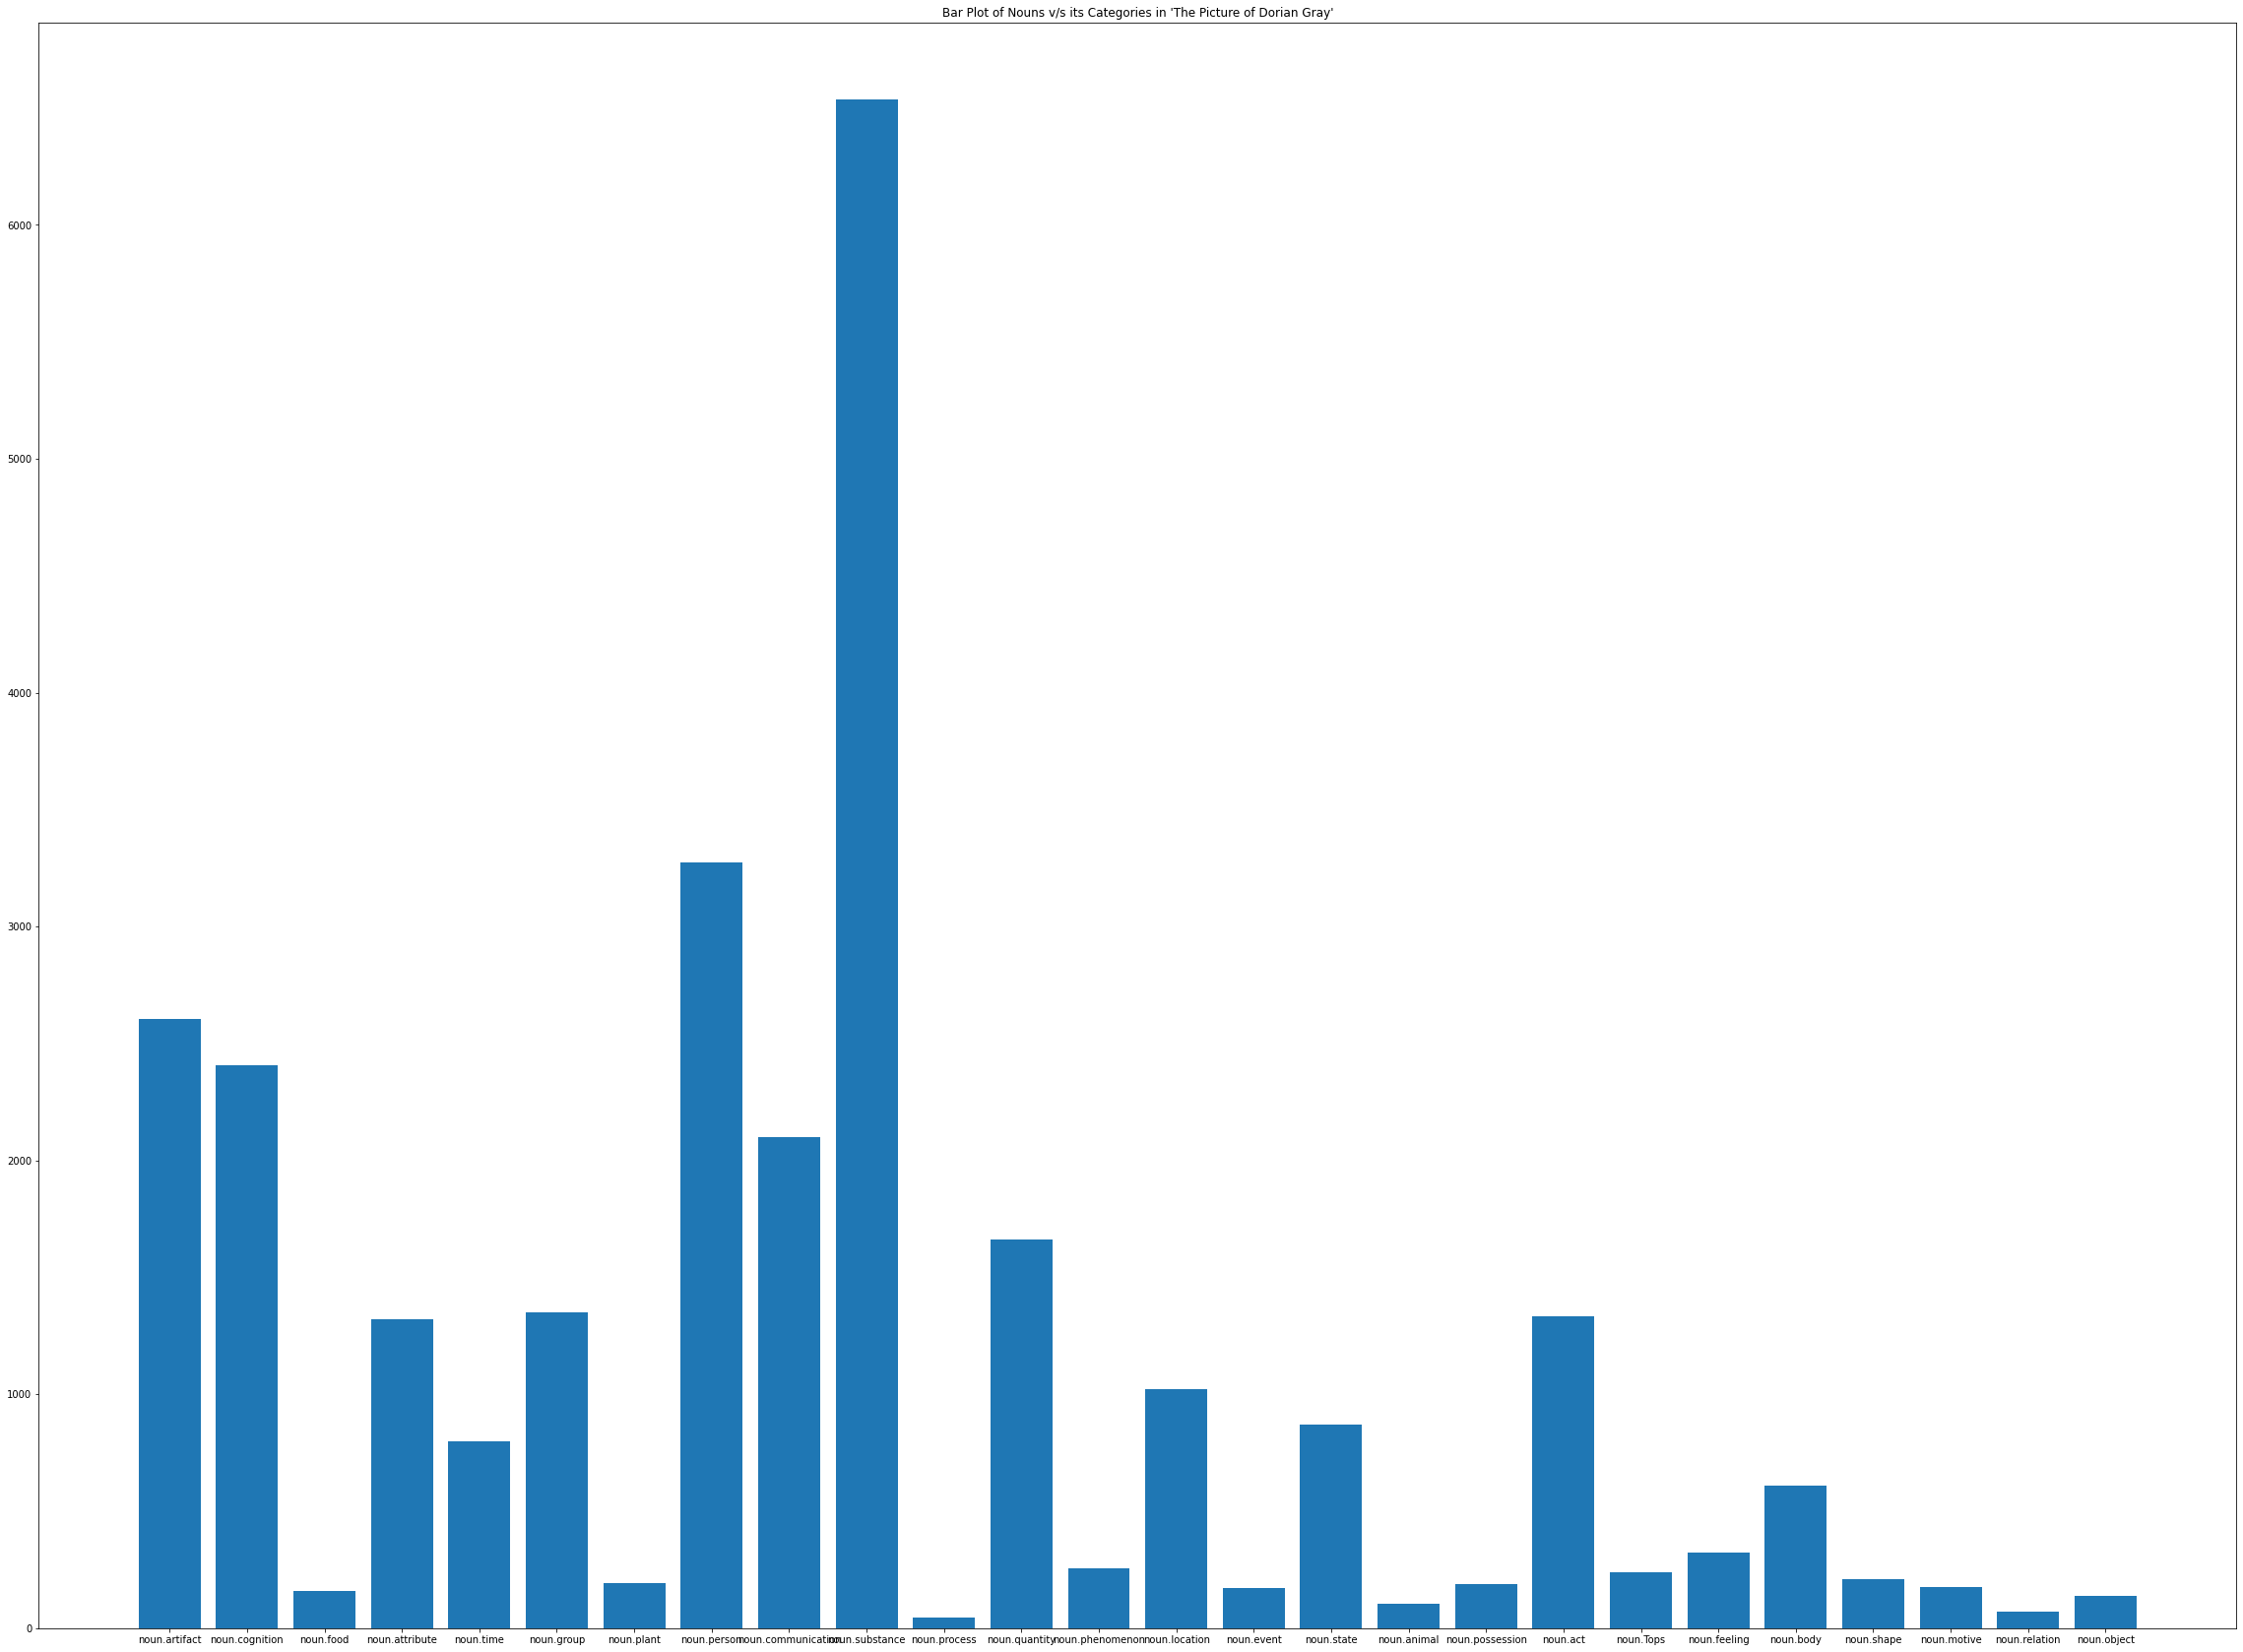

In [18]:
""" Bar Plot of Nouns v/s its Categories
"""
plotBarPlot(nounsCount1.keys(), nounsCount1.values(), "Bar Plot of Nouns v/s its Categories in \'Dead Men Tell No Tales\'")
plotBarPlot(nounsCount2.keys(), nounsCount2.values(), "Bar Plot of Nouns v/s its Categories in \'The Picture of Dorian Gray\'")

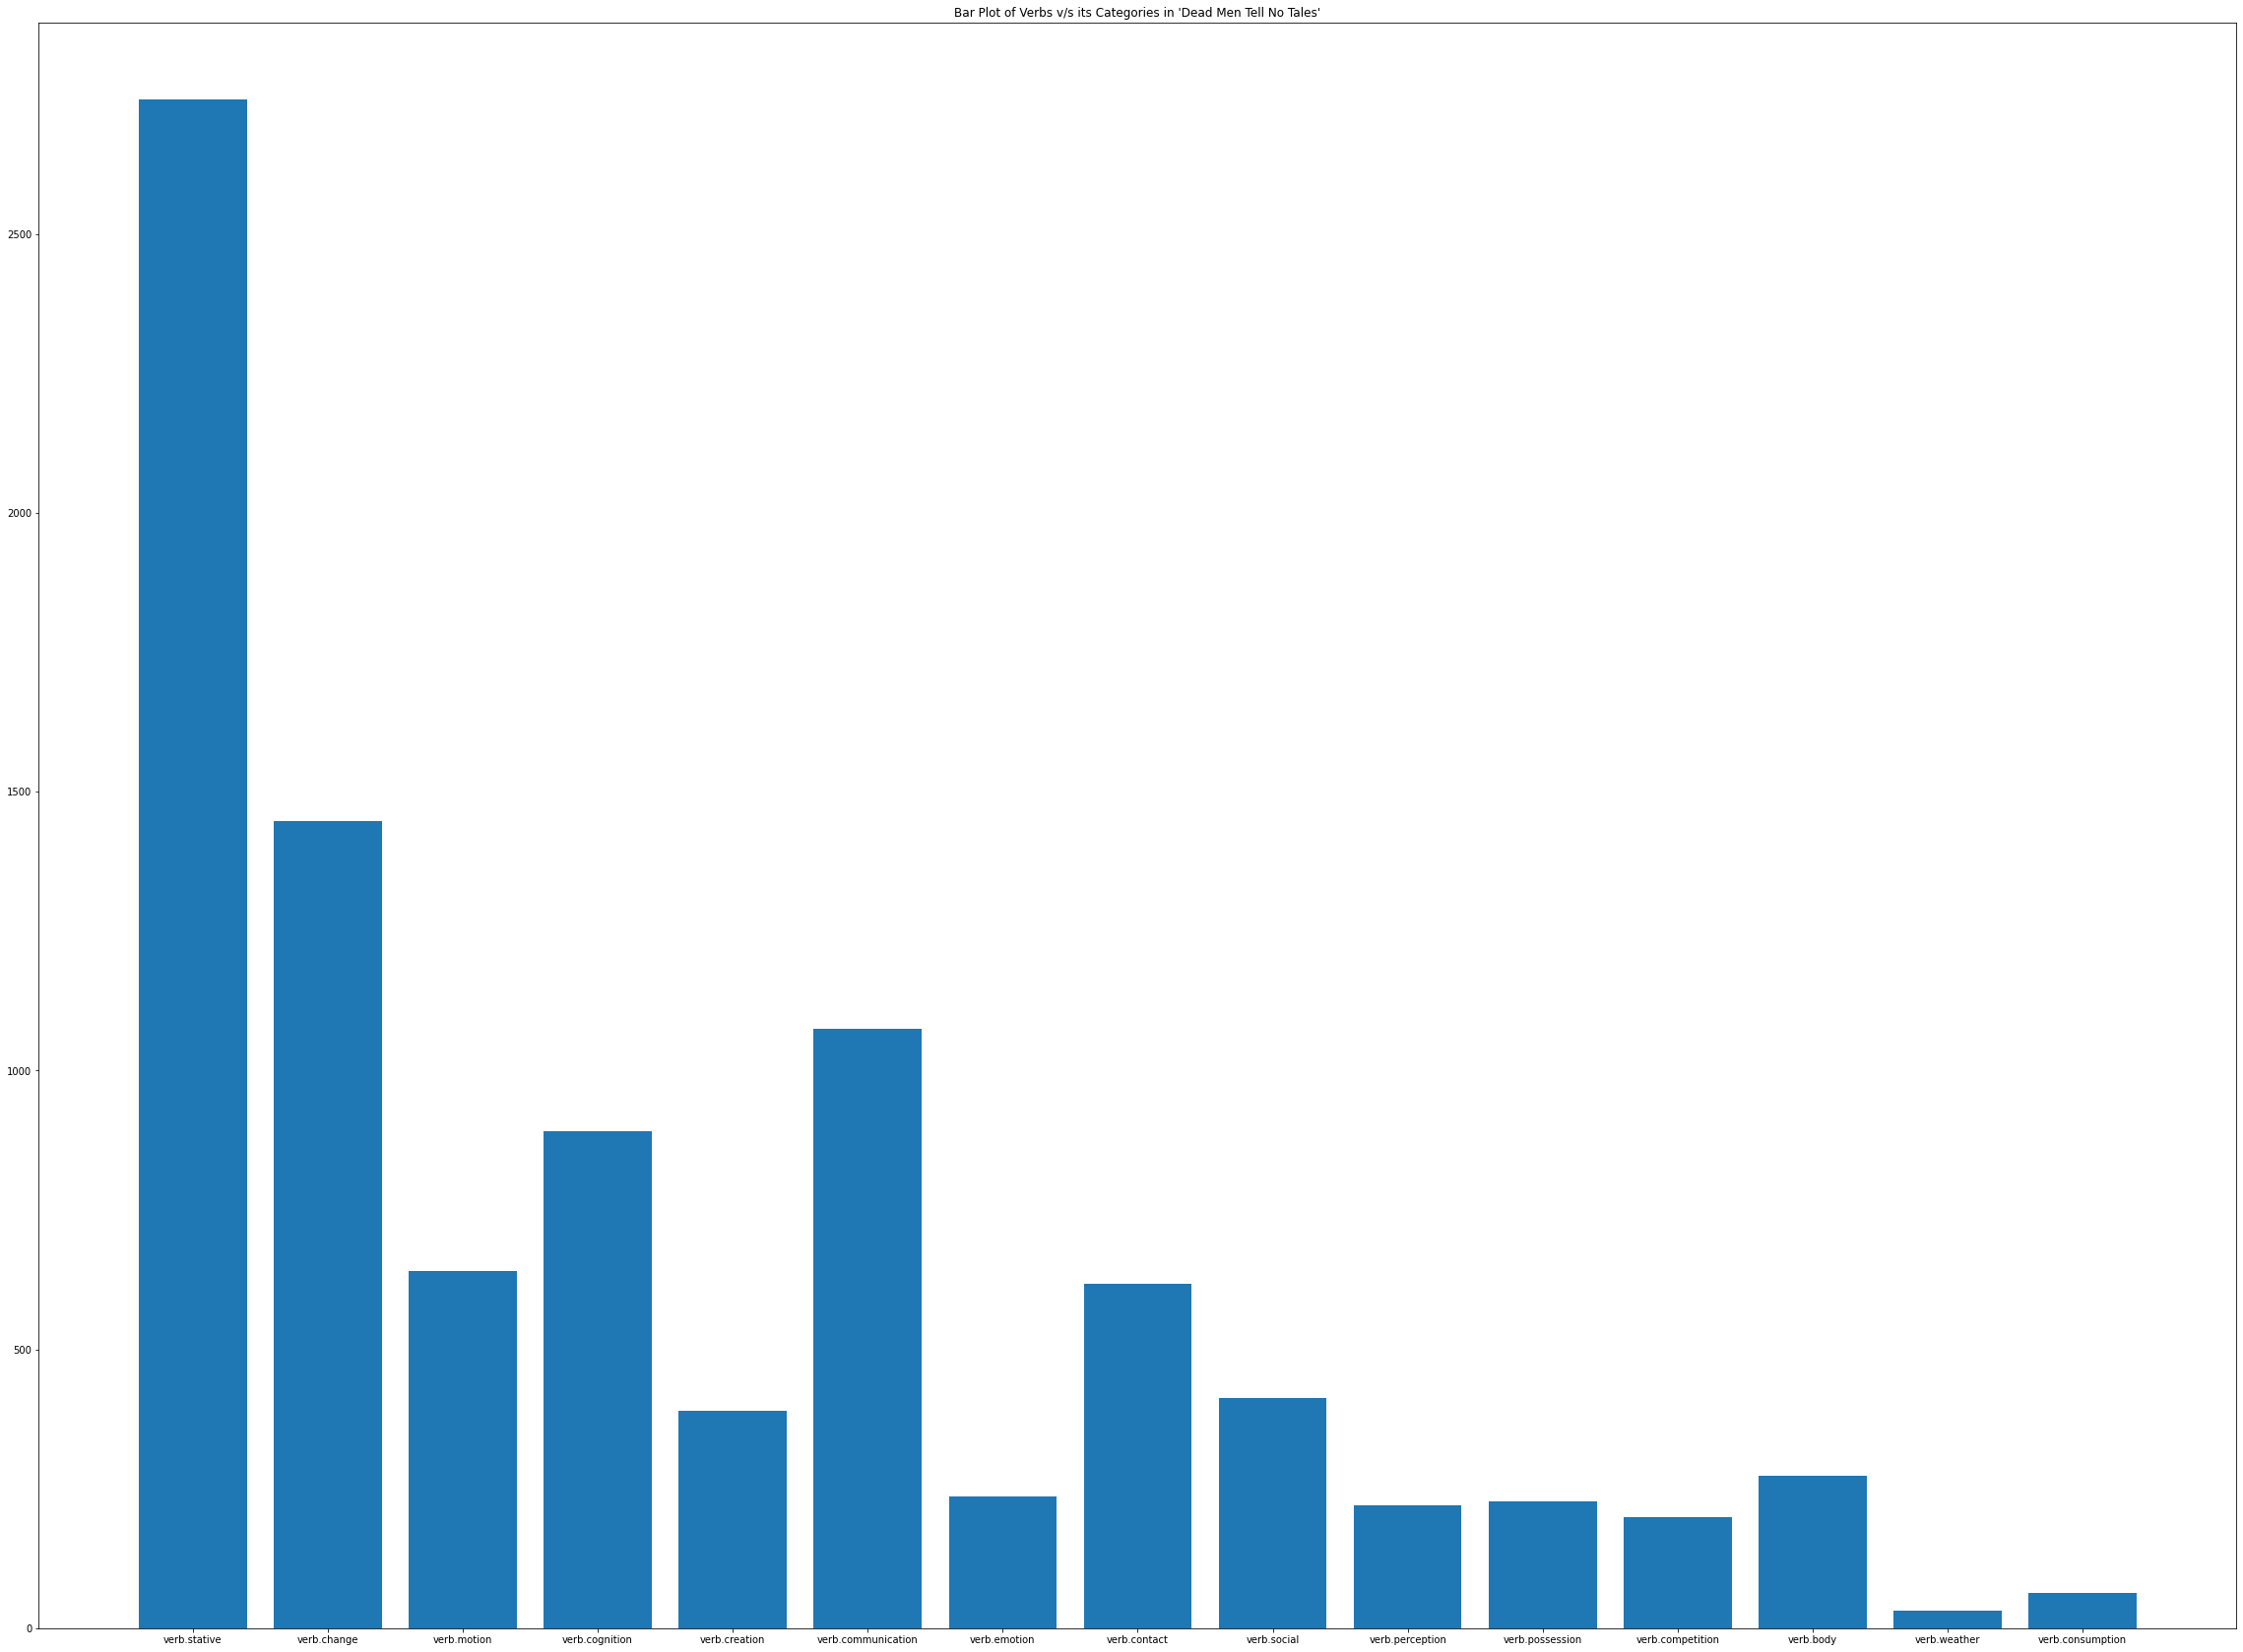

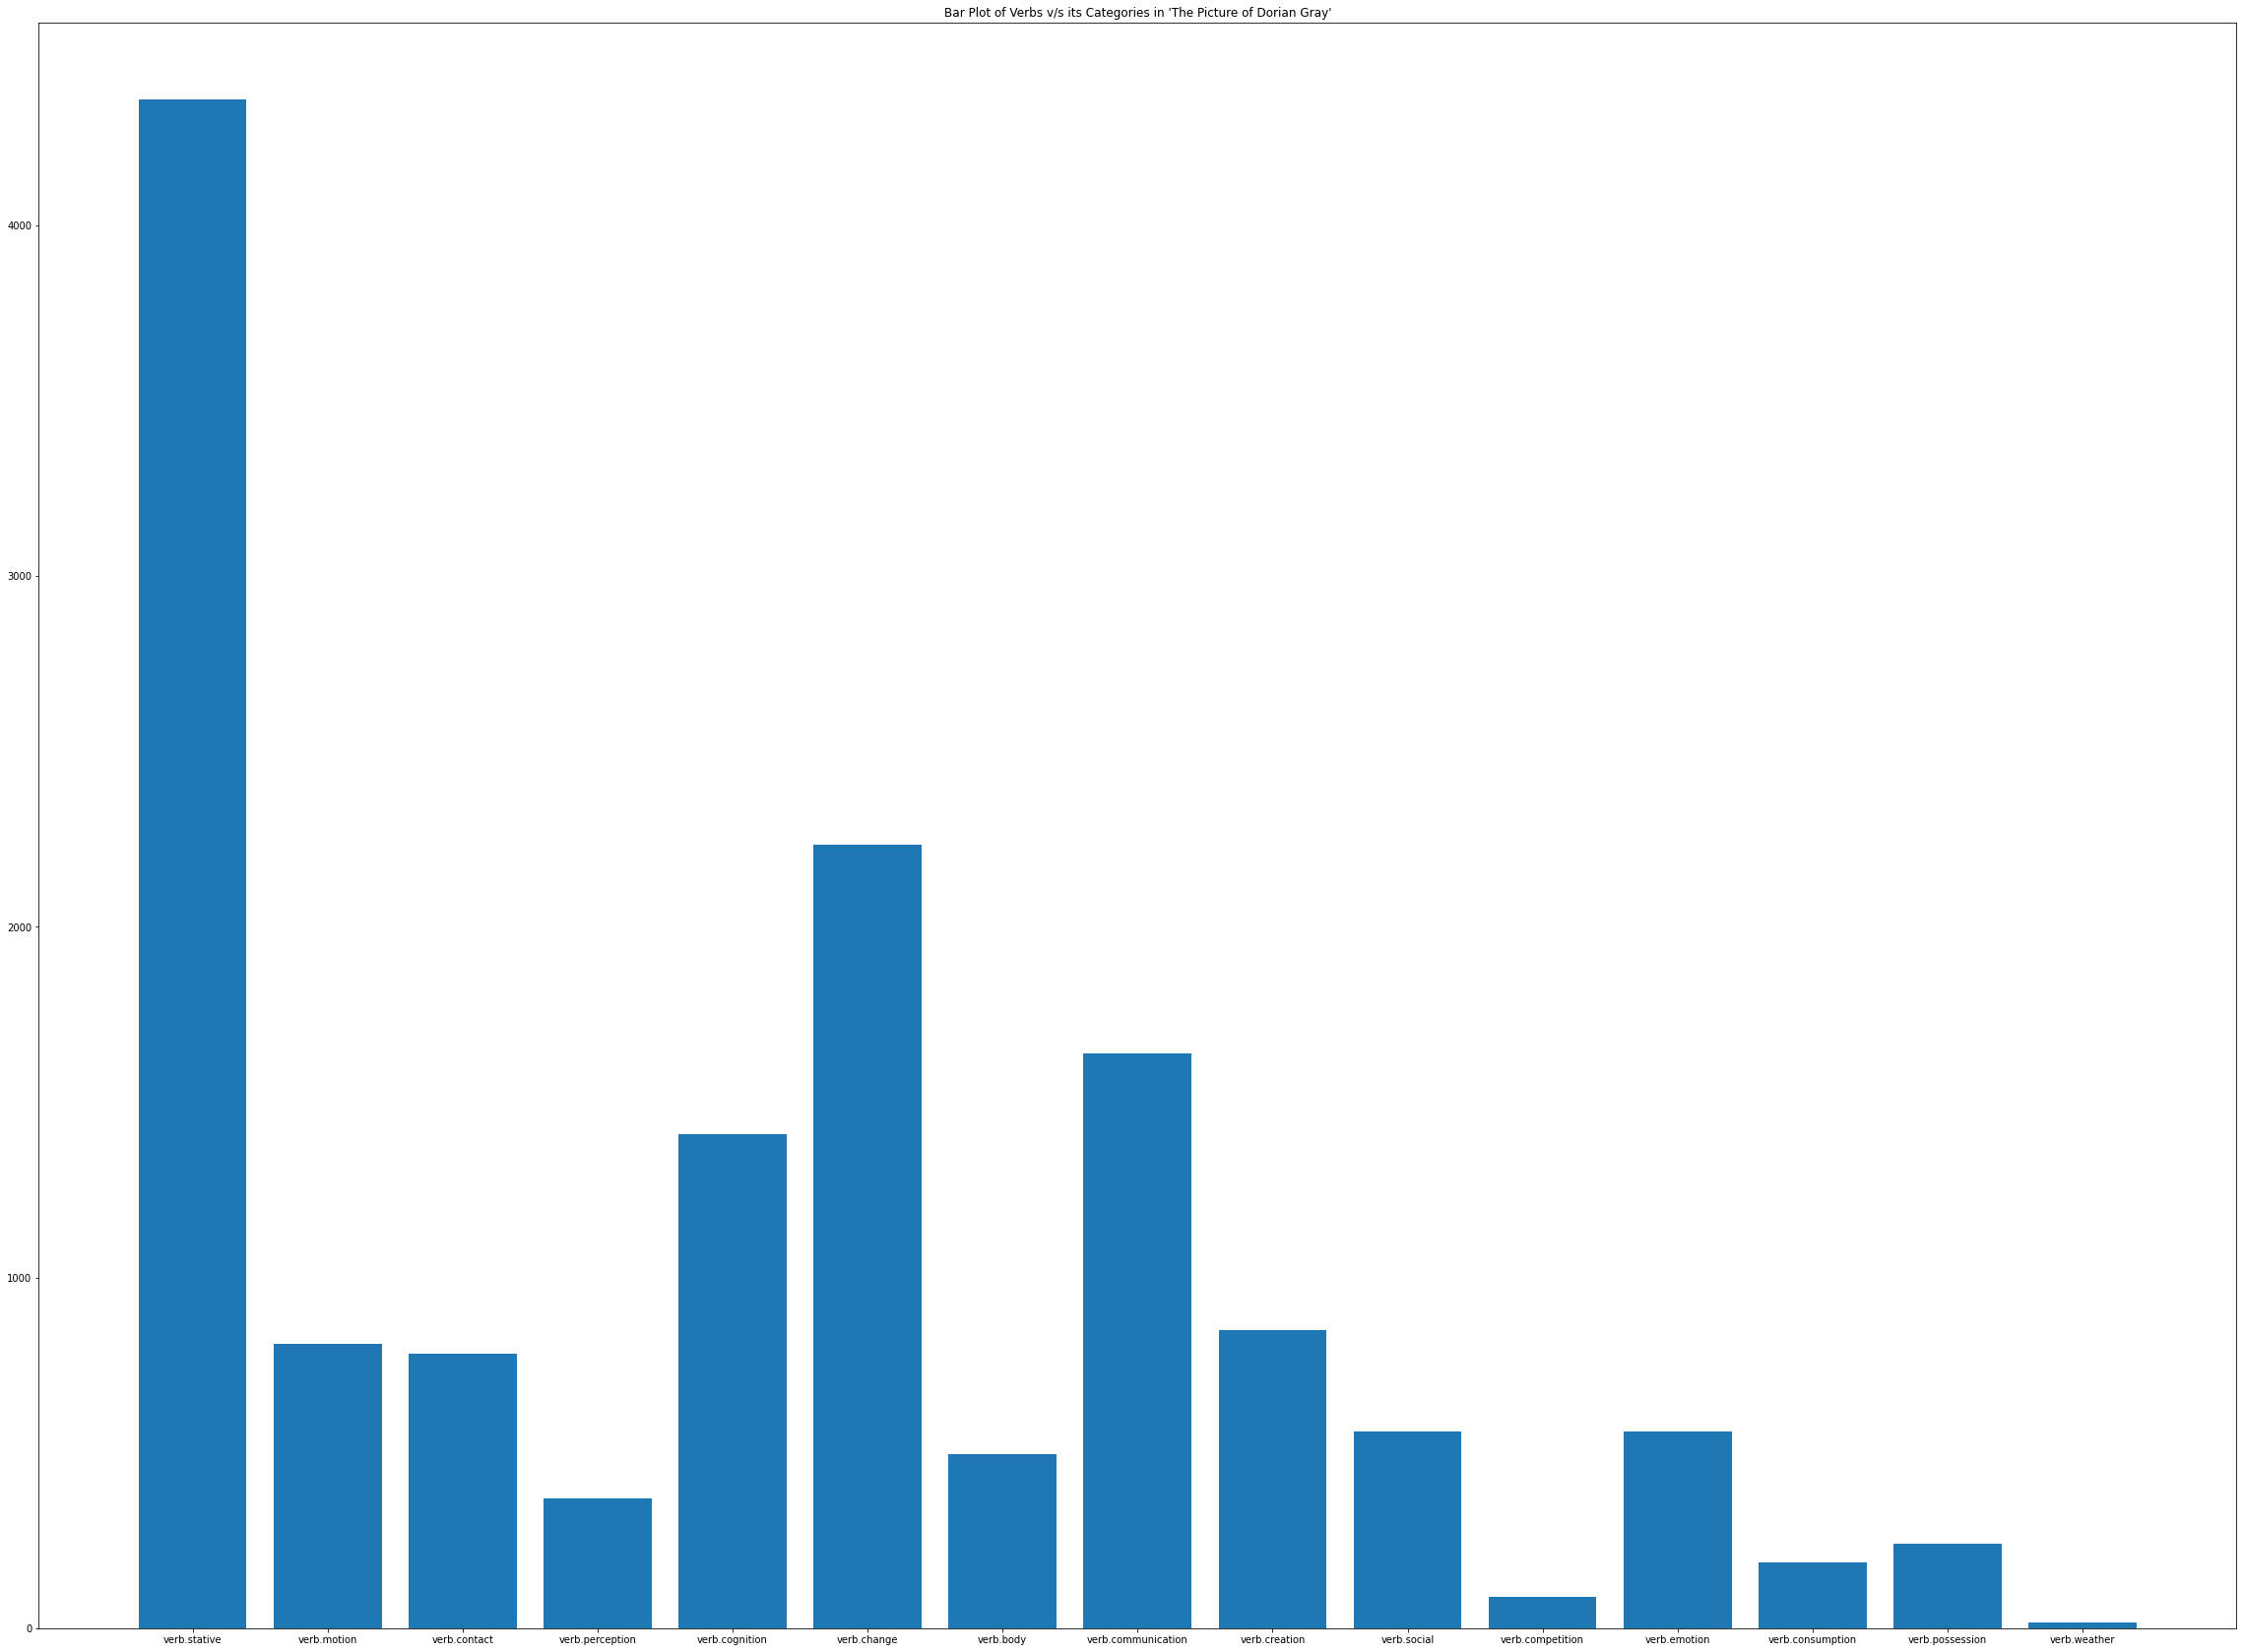

In [19]:
""" Bar Plot of Verbs v/s its Categories
"""
plotBarPlot(verbsCount1.keys(), verbsCount1.values(), "Bar Plot of Verbs v/s its Categories in \'Dead Men Tell No Tales\'")
plotBarPlot(verbsCount2.keys(), verbsCount2.values(), "Bar Plot of Verbs v/s its Categories in \'The Picture of Dorian Gray\'")

In [20]:
nlp = en_core_web_sm.load()

In [21]:
""" Named Entity Recognition including entities like
PERSON, LOCATION, ORGANIZATION, TIME, GPE, CARDINAL, etc. 
for the book Dead Men Tell No Tales
"""
document1 = nlp(cleanedBook1)
displacy.render(document1, style="ent", jupyter=True)

In [22]:
""" Named Entity Recognition including entities like
PERSON, LOCATION, ORGANIZATION, TIME, GPE, CARDINAL, etc. 
for sample texts in the book Dead Men Tell No Tales for 
accuracy calculation
"""
documentForAccuracy1 = nlp(cleanedBook1[947:1928] + cleanedBook1[8481:9659] + cleanedBook1[69440:69969] + \
               cleanedBook1[97362:98298] + cleanedBook1[136672:138385] + cleanedBook1[269850:271312])
displacy.render(documentForAccuracy1, style="ent", jupyter=True)

In [23]:
""" Predicted entity tags for the sample text
in the book Dead Men Tell No Tales
"""
prediction1 = ([(entity.text, entity.label_) for entity in documentForAccuracy1.ents])
prediction1

[('Eva Denison', 'PERSON'),
 ('more than nineteen years of age', 'DATE'),
 ('first', 'ORDINAL'),
 ('her years', 'DATE'),
 ('Denison', 'PERSON'),
 ('a hundred', 'CARDINAL'),
 ('noon', 'TIME'),
 ('night', 'TIME'),
 ('the evening of the day', 'TIME'),
 ('the Island of Ascension', 'FAC'),
 ('quarter', 'CARDINAL'),
 ('minute', 'TIME'),
 ('a heavenly night', 'TIME'),
 ("Eva Denison's", 'PERSON'),
 ('twenty minutes', 'TIME'),
 ('the first night', 'TIME'),
 ('night', 'TIME'),
 ('That night', 'TIME'),
 ('the morning', 'TIME'),
 ('four', 'CARDINAL'),
 ('Harley Street', 'FAC'),
 ('That night', 'TIME'),
 ('Deane', 'GPE'),
 ('Adams', 'GPE'),
 ("Regent's Park", 'FAC'),
 ('Primrose Hill', 'FAC'),
 ('the Avenue Road', 'FAC'),
 ('Finchley', 'PERSON'),
 ('the Lady Jermyn', 'PERSON'),
 ('Loud', 'PERSON'),
 ('Joaquin Santos', 'PERSON'),
 ('an hour', 'TIME'),
 ('first', 'ORDINAL'),
 ('Harris', 'PERSON'),
 ('Harris', 'PERSON'),
 ('Santos', 'PERSON'),
 ('half a minute', 'TIME'),
 ('Kirby House', 'PERSON'),
 

In [24]:
""" Entity tags for the sample text given
by the human annotator for the book
Dead Men Tell No Tales
"""
human1 = [('Eva Denison', 'PERSON'),
         ('more than nineteen years of age', 'DATE'),
         ('first', 'ORDINAL'),
         ('her years', '--'),
         ('Denison', 'PERSON'),
         ('a hundred', 'CARDINAL'),
         ('noon', 'TIME'),
         ('night', 'TIME'),
         ('the evening of the day', 'TIME'),
         ('the Island of Ascension', 'LOC'),
         ('quarter', 'CARDINAL'),
         ('minute', 'TIME'),
         ('a heavenly night', 'TIME'),
         ("Eva Denison's", 'PERSON'),
         ('twenty minutes', 'TIME'),
         ('the first night', 'TIME'),
         ('night', 'TIME'),
         ('That night', 'TIME'),
         ('the morning', 'TIME'),
         ('four', 'CARDINAL'),
         ('Harley Street', 'FAC'),
         ('That night', 'TIME'),
         ('Deane and Adams', 'ORG'),
         ("Regent's Park", 'FAC'),
         ('Primrose Hill', 'LOC'),
         ('the Avenue Road', 'FAC'),
         ('Finchley', 'PERSON'),
         ('the Lady Jermyn', 'PERSON'),
         ('Loud', '--'),
         ('Joaquin Santos', 'PERSON'),
         ('an hour', 'TIME'),
         ('first', 'ORDINAL'),
         ('Harris', 'PERSON'),
         ('Harris', 'PERSON'),
         ('Santos', 'PERSON'),
         ('half a minute', 'TIME'),
         ('Kirby House', 'FAC'),
         ('this day', 'DATE'),
         ("five minutes'", 'TIME')]

In [25]:
print("Accuracy for Named Entity Recognition in \'Dead Men Tell No Tales\': {:.2f}%".format(getAccuracy(prediction1, human1)))

Accuracy for Named Entity Recognition in 'Dead Men Tell No Tales': 87.18%


In [26]:
""" Named Entity Recognition including entities like
PERSON, LOCATION, ORGANIZATION, TIME, GPE, CARDINAL, etc. 
for the book The Picture of Dorian Gray
"""
document2 = nlp(cleanedBook2)
displacy.render(document2, style="ent", jupyter=True)

In [27]:
""" Named Entity Recognition including entities like
PERSON, LOCATION, ORGANIZATION, TIME, GPE, CARDINAL, etc. 
for sample texts in the book The Picture of Dorian Gray 
accuracy calculation
"""
documentForAccuracy2 = nlp(cleanedBook2[3529:5879] + cleanedBook2[10070:11574] + \
               cleanedBook2[276676:280126] + cleanedBook2[313860:314628] + cleanedBook2[428596:429727])
displacy.render(documentForAccuracy2, style="ent", jupyter=True)

In [28]:
""" Predicted entity tags for the sample text
in the book Dead Men Tell No Tales
"""
prediction2 = ([(entity.text, entity.label_) for entity in documentForAccuracy2.ents])
prediction2

[('Basil', 'ORG'),
 ('Adonis', 'NORP'),
 ('Basil', 'PERSON'),
 ('Narcissus', 'ORG'),
 ('one', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('Church', 'ORG'),
 ('Church', 'ORG'),
 ('the age of eighty', 'DATE'),
 ('eighteen', 'DATE'),
 ('winter', 'DATE'),
 ('summer', 'DATE'),
 ('Basil', 'NORP'),
 ('Harry', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Dorian', 'NORP'),
 ('Two months ago', 'DATE'),
 ("Lady Brandon's", 'PERSON'),
 ('evening', 'TIME'),
 ('about ten minutes', 'TIME'),
 ('half', 'CARDINAL'),
 ('Dorian', 'NORP'),
 ('first', 'ORDINAL'),
 ('Harry', 'PERSON'),
 ('Dorian', 'NORP'),
 ('Dorian', 'NORP'),
 ('one', 'CARDINAL'),
 ('Philip Herbert', 'PERSON'),
 ('Francis Osborne', 'PERSON'),
 ('Memoires on the Reigns of Queen Elizabeth', 'WORK_OF_ART'),
 ('Herbert', 'PERSON'),
 ("Basil Hallward's", 'ORG'),
 ('Anthony Sherard', 'PERSON'),
 ('Giovanna', 'GPE'),
 ('Naples', 'GPE'),
 ('Lady Elizabeth Devereux', 'PERSON'),
 ('George Willoughby', 'PERSON'),
 ('the eighteenth century', 'DATE'),
 ('the Prince Reg

In [29]:
""" Entity tags for the sample text given
by the human annotator for the book
The Picture of Dorian Gray
"""
human2 = [('Basil', 'PERSON'),
          ('Adonis', 'PERSON'),
          ('Basil', 'PERSON'),
          ('Narcissus', 'PERSON'),
          ('one', 'CARDINAL'),
          ('one', 'CARDINAL'),
          ('Church', 'ORG'),
          ('Church', 'ORG'),
          ('the age of eighty', 'DATE'),
          ('eighteen', 'DATE'),
          ('winter', 'DATE'),
          ('summer', 'DATE'),
          ('Basil', 'PERSON'),
          ('Harry', 'PERSON'),
          ('Harry', 'PERSON'),
          ('Dorian', 'PERSON'),
          ('Two months ago', 'DATE'),
          ("Lady Brandon's", 'PERSON'),
          ('evening', 'TIME'),
          ('about ten minutes', 'TIME'),
          ('half', 'CARDINAL'),
          ('Dorian', 'PERSON'),
          ('first', 'ORDINAL'),
          ('Harry', 'PERSON'),
          ('Dorian', 'PERSON'),
          ('Dorian', 'PERSON'),
          ('the Duchess of Harley', 'PERSON'),
          ('Next', '--'),
          ('Thomas Burdon', 'PERSON'),
          ('Radical', 'NORP'),
          ('Parliament', 'ORG'),
          ('Tories', 'NORP'),
          ('Liberals', 'NORP'),
          ('Erskine', 'PERSON'),
          ('Treadley', 'GPE'),
          ('Lady Agatha', 'PERSON'),
          ('thirty', 'DATE'),
          ('Vandeleur', 'PERSON'),
          ('one', 'CARDINAL'),
          ('one', 'CARDINAL'),
          ('hymn-book', 'PERSON'),
          ('Lord Faudel', 'PERSON'),
          ('the House of Commons', 'ORG'),
          ('one', 'CARDINAL'),
          ('Dorian', 'PERSON'),
          ('one', 'CARDINAL'),
          ('Philip Herbert', 'PERSON'),
          ('Francis Osborne', 'PERSON'),
          ('Memoires on the Reigns of Queen Elizabeth', 'WORK_OF_ART'),
          ('Herbert', 'PERSON'),
          ("Basil Hallward's", 'ORG'),
          ('Anthony Sherard', 'PERSON'),
          ('Giovanna', 'GPE'),
          ('Naples', 'GPE'),
          ('Lady Elizabeth Devereux', 'PERSON'),
          ('George Willoughby', 'PERSON'),
          ('the eighteenth century', 'DATE'),
          ('the Prince Regent', 'PERSON'),
          ('his wildest days', 'DATE'),
          ('one', 'CARDINAL'),
          ('Fitzherbert', 'PERSON'),
          ('Carlton House', 'ORG'),
          ('Garter', 'PERSON'),
          ('Lady Hamilton', 'PERSON'),
          ('November', 'DATE'),
          ('almost like a morning', 'TIME'),
          ('May.', 'DATE'),
          ('the preceding night', 'TIME'),
          ('Basil Hallward', 'PERSON'),
          ('the day', 'DATE'),
          ('Constable', 'PERSON'),
          ('two', 'CARDINAL'),
          ("Dorian Gray's", 'PERSON'),
          ('One', 'CARDINAL'),
          ('Henry Ashton', 'PERSON'),
          ('half', 'CARDINAL'),
          ('Leaf', 'PERSON'),
          ('Francis', 'PERSON'),
          ('about a quarter', 'CARDINAL'),
          ('one', 'CARDINAL'),
          ('Lying', '--'),
          ('evening', 'TIME')]

In [30]:
print("Accuracy for Named Entity Recognition in \The Picture of Dorian Gray\': {:.2f}%".format(getAccuracy(prediction2, human2)))

Accuracy for Named Entity Recognition in \The Picture of Dorian Gray': 60.98%


In [31]:
""" Installation of CoreNLP client
"""
stanza.install_corenlp()
client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=["openie"], endpoint="http://localhost:9001")
client.start()
time.sleep(10)

2020-12-20 16:49:13 INFO: Installing CoreNLP package into /root/stanza_corenlp...
2020-12-20 16:49:30 INFO: Writing properties to tmp file: corenlp_server-8cc3c1aa7ebd439d.props
2020-12-20 16:49:30 INFO: Starting server with command: java -Xmx5G -cp /root/stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8cc3c1aa7ebd439d.props -annotators openie -preload -outputFormat serialized


In [32]:
""" Method to extract relation between the
named entities in text
"""
def relationExtraction(text):
  document = client.annotate(text, output_format="json")
  sentenceTriplets = []
  for sentence in document["sentences"]:
    for triplet in sentence["openie"]:
      subjects = nlp(triplet["subject"])
      objects = nlp(triplet["object"])
      subjectEntityTag = ([entity.label_ for entity in subjects.ents])
      objectEntityTag = ([entity.label_ for entity in objects.ents])
      if subjectEntityTag and objectEntityTag:
        sentenceTriplets.append({"subject": (subjectEntityTag, triplet["subject"]), \
                                 "relation": triplet["relation"], \
                                 "object": (objectEntityTag, triplet["object"])})
  for triplet in sentenceTriplets:
    print(triplet)

In [33]:
""" Relation extraction in the book
Dead Men Tell No Tales
"""
relationExtraction(cleanedBook1[:100000])
relationExtraction(cleanedBook1[100000:200000])
relationExtraction(cleanedBook1[200000:])

{'subject': (['PERSON'], 'tiny golden streamer'), 'relation': 'is in', 'object': (['PERSON'], 'tropic sun')}
{'subject': (['PERSON'], 'tiny crucifix inlaid'), 'relation': 'is in', 'object': (['ORG'], 'mosaic')}
{'subject': (['TIME'], "five minutes ' conversation"), 'relation': 'is with', 'object': (['PERSON'], 'Miss Denison')}
{'subject': (['PERSON'], 'Miss Denison'), 'relation': 'will grant', 'object': (['TIME'], 'five minutes')}
{'subject': (['PERSON'], 'starboard gangway'), 'relation': 'tumbling', 'object': (['PERSON'], 'skelter aboard boat')}
{'subject': (['PERSON'], 'starboard gangway'), 'relation': 'tumbling', 'object': (['PERSON'], 'helter skelter aboard boat')}
{'subject': (['PERSON'], 'starboard gangway'), 'relation': 'tumbling', 'object': (['PERSON'], 'skelter aboard lowered boat')}
{'subject': (['PERSON'], 'starboard gangway'), 'relation': 'tumbling', 'object': (['PERSON'], 'helter skelter aboard lowered boat')}
{'subject': (['CARDINAL'], 'one'), 'relation': 'be completed on

In [34]:
""" Relation extraction in the book
The Picture of Dorian Gray
"""
relationExtraction(cleanedBook2[:100000])
relationExtraction(cleanedBook2[100000:200000])
relationExtraction(cleanedBook2[200000:300000])
relationExtraction(cleanedBook2[300000:400000])
relationExtraction(cleanedBook2[400000:])

{'subject': (['ORG'], 'dim roar'), 'relation': 'was like', 'object': (['ORG'], 'bourdon note of organ')}
{'subject': (['ORG'], 'dim roar'), 'relation': 'was like', 'object': (['ORG'], 'bourdon note of distant organ')}
{'subject': (['ORG'], 'dim roar'), 'relation': 'was like', 'object': (['ORG'], 'bourdon note')}
{'subject': (['PERSON'], 'poor Southwark'), 'relation': 'got into', 'object': (['ORG'], 'divorce court')}
{'subject': (['PERSON'], 'Lord Henry'), 'relation': 'tapped toe with', 'object': (['PERSON'], 'tasselled ebony cane')}
{'subject': (['PERSON'], 'Lord Henry'), 'relation': 'tapped toe with', 'object': (['PERSON'], 'ebony cane')}
{'subject': (['PERSON'], 'Lord Henry'), 'relation': 'stroked', 'object': (['PERSON'], 'his pointed brown beard')}
{'subject': (['ORG'], 'rustle'), 'relation': 'was in', 'object': (['ORG'], 'lacquer leaves')}
{'subject': (['ORG'], 'rustle'), 'relation': 'was in', 'object': (['PERSON'], 'green lacquer leaves')}
{'subject': (['ORG'], 'rustle'), 'relatio